# EDA

## Ads

1. Distribusi Platform : Apakah TikTok atau Meta Ads lebih dominan?
2. Sentiment Score : Bagaimana distribusi skor sentimen? Apakah ada perbedaan signifikan antara platform atau tipe produk?
3. Waktu Pembuatan Iklan : Kapan iklan paling sering dibuat (berdasarkan tahun/bulan)?
4. Hubungan Antar Variabel : Apakah ada pola tertentu antara target audiens, platform, dan skor sentimen?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Memuat data dari file CSV
data = pd.read_csv('ads_table.csv')

# Menampilkan beberapa baris pertama dari dataset
data.head()

,Ad_ID,Platform,Ad_Type,Product_Type,Sentiment_Score,Target_Audience,Created_Date
0,A001,TikTok,Carousel,Bootcamp,0.78,Intermediate,2023-11-28
1,A002,TikTok,Image,Live Code,0.37,Beginner,2024-04-30
2,A003,Meta Ads,Carousel,Bootcamp,0.59,Intermediate,2023-10-08
3,A004,TikTok,Video,Bootcamp,0.25,Advanced,2024-08-25
4,A005,Meta Ads,Image,Live Code,0.94,Beginner,2023-04-11


In [ ]:
# Informasi umum tentang dataset
print(data.info())

# Statistik deskriptif untuk kolom numerik
print(data.describe())

# Cek missing values
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ad_ID            50 non-null     object 
 1   Platform         50 non-null     object 
 2   Ad_Type          50 non-null     object 
 3   Product_Type     50 non-null     object 
 4   Sentiment_Score  50 non-null     float64
 5   Target_Audience  50 non-null     object 
 6   Created_Date     50 non-null     object 
dtypes: float64(1), object(6)
memory usage: 2.9+ KB
None
       Sentiment_Score
count        50.000000
mean          0.591200
std           0.258304
min           0.120000
25%           0.385000
50%           0.630000
75%           0.787500
max           1.000000
Ad_ID              0
Platform           0
Ad_Type            0
Product_Type       0
Sentiment_Score    0
Target_Audience    0
Created_Date       0
dtype: int64


In [ ]:
# 1. Distribusi platform iklan
platform_counts = data['Platform'].value_counts()
print(platform_counts)

Platform
TikTok      28
Meta Ads    22
Name: count, dtype: int64


<ipython-input-7-d13c9b4067c9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Platform', palette='Set2')


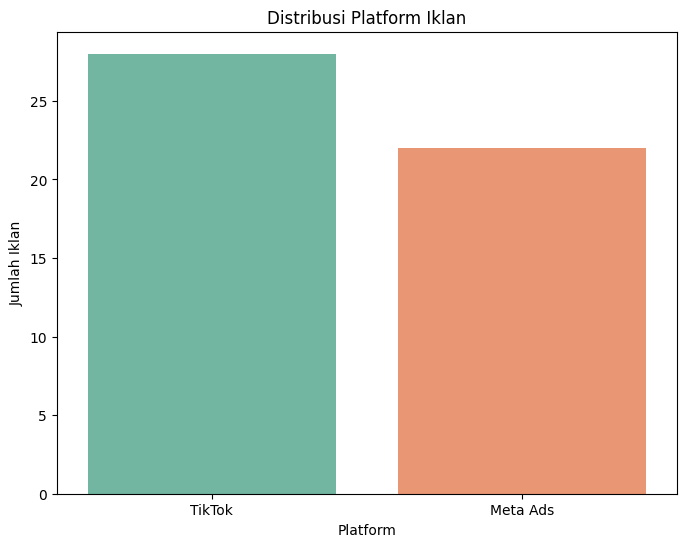

In [ ]:
# Visualisasi distribusi platform
plt.figure(figsize=(8,6))
sns.countplot(data=data, x='Platform', palette='Set2')
plt.title('Distribusi Platform Iklan')
plt.xlabel('Platform')
plt.ylabel('Jumlah Iklan')
plt.show()

**Insight:** Platform Tiktok memiliki jumlah iklan lebih banyak dibandingkan Meta Ads. Hal ini berarti Tiktok lebih dominan.

In [ ]:
# 2. Distribusi sentiment score
print("\n1. Deskripsi Statistik Sentiment Score per Platform:")
sentiment_by_platform = data.groupby('Platform')['Sentiment_Score'].describe()
print(sentiment_by_platform)

print("\nDeskripsi Statistik Sentiment Score per Product Type:")
sentiment_by_product = data.groupby('Product_Type')['Sentiment_Score'].describe()
print(sentiment_by_product)


1. Deskripsi Statistik Sentiment Score per Platform:
          count      mean       std   min     25%    50%     75%   max
Platform                                                              
Meta Ads   22.0  0.605000  0.271622  0.17  0.3925  0.615  0.8175  1.00
TikTok     28.0  0.580357  0.251845  0.12  0.4150  0.650  0.7525  0.92

Deskripsi Statistik Sentiment Score per Product Type:
               count      mean       std   min     25%   50%     75%   max
Product_Type                                                              
Bootcamp        22.0  0.595000  0.252601  0.12  0.4725  0.67  0.7725  1.00
Learning Plan   13.0  0.533077  0.282028  0.12  0.3100  0.49  0.7600  0.92
Live Code       15.0  0.636000  0.253625  0.17  0.4150  0.62  0.8850  0.94


<ipython-input-25-87c7ba43aee4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Platform', y='Sentiment_Score', data=data, palette='Set2', ax=axes[0])
<ipython-input-25-87c7ba43aee4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product_Type', y='Sentiment_Score', data=data, palette='Set3', ax=axes[1])


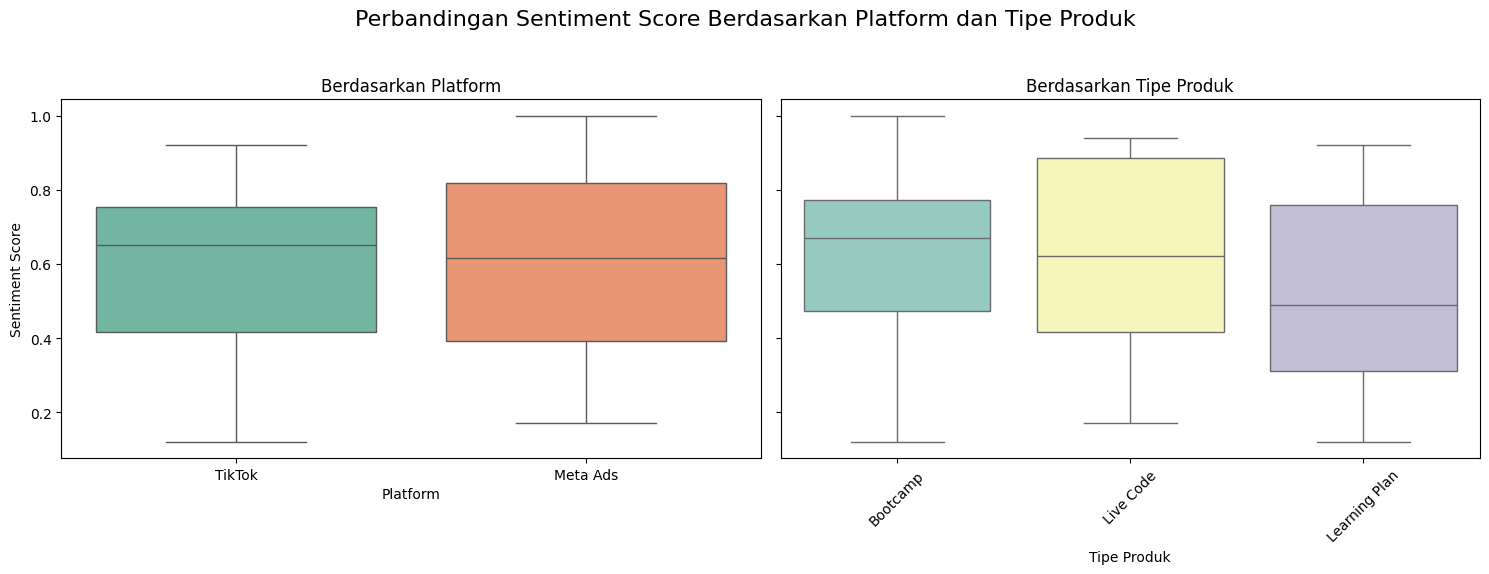

In [ ]:
# Visualisasi distribusi sentiment score
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
fig.suptitle('Perbandingan Sentiment Score Berdasarkan Platform dan Tipe Produk', fontsize=16)

# a. Boxplot Sentiment Score berdasarkan Platform
sns.boxplot(x='Platform', y='Sentiment_Score', data=data, palette='Set2', ax=axes[0])
axes[0].set_title('Berdasarkan Platform')
axes[0].set_xlabel('Platform')
axes[0].set_ylabel('Sentiment Score')

# b. Boxplot Sentiment Score berdasarkan Tipe Produk
sns.boxplot(x='Product_Type', y='Sentiment_Score', data=data, palette='Set3', ax=axes[1])
axes[1].set_title('Berdasarkan Tipe Produk')
axes[1].set_xlabel('Tipe Produk')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Insight:** Berdasarkan grafik, distribusi skor sentimen menunjukkan bahwa iklan di TikTok mendapatkan sentimen yang lebih positif dibandingkan dengan Meta Ads, terlihat dari median yang lebih tinggi pada TikTok. Untuk tipe produk, Bootcamp memiliki median skor sentimen tertinggi, diikuti oleh Live Code, dan yang terendah adalah Learning Plan. Ini menunjukkan bahwa iklan Bootcamp cenderung mendapatkan sentimen paling positif dari pengguna. Secara keseluruhan, terlihat adanya perbedaan dalam distribusi skor sentimen baik berdasarkan platform maupun tipe produk, dengan TikTok dan Bootcamp menonjol dalam hal sentimen yang lebih positif.

In [ ]:
# 3. Waktu pembuatan iklan
data['Created_Date'] = pd.to_datetime(data['Created_Date'])
data['YearMonth'] = data['Created_Date'].dt.to_period('M')
ads_per_month = data['YearMonth'].value_counts().sort_index()
print("\nJumlah Iklan per Bulan:\n", ads_per_month)


Jumlah Iklan per Bulan:
 YearMonth
2023-01    1
2023-02    1
2023-03    2
2023-04    3
2023-05    1
2023-06    1
2023-07    2
2023-08    4
2023-09    3
2023-10    4
2023-11    2
2023-12    2
2024-01    3
2024-02    2
2024-03    2
2024-04    3
2024-05    1
2024-06    2
2024-07    2
2024-08    2
2024-09    1
2024-10    2
2025-01    4
Freq: M, Name: count, dtype: int64


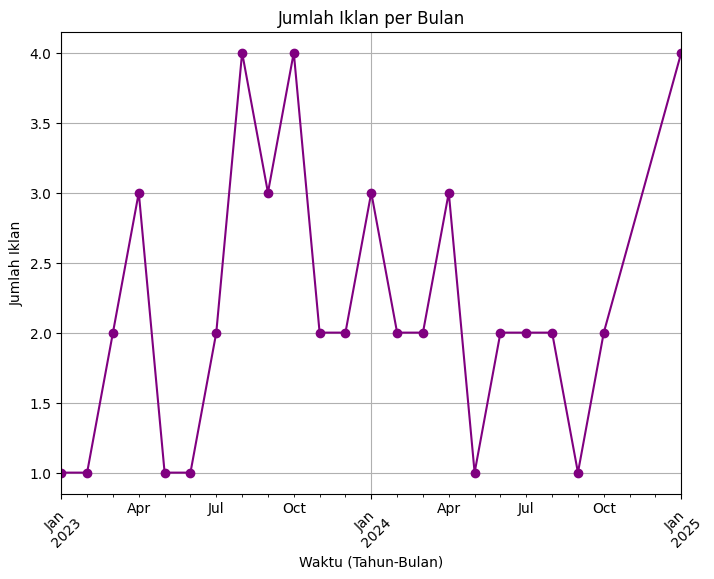

In [ ]:
# Visualisasi waktu pembuatan iklan
plt.figure(figsize=(8,6))
ads_per_month.plot(kind='line', marker='o', color='purple')
plt.title('Jumlah Iklan per Bulan')
plt.xlabel('Waktu (Tahun-Bulan)')
plt.ylabel('Jumlah Iklan')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Insight:** Iklan paling sering dibuat pada Agustus dan Oktober 2023 serta Januari 2025, dengan jumlah iklan mencapai 4 kali dalam masing-masing bulan tersebut.

In [ ]:
# Hubungan antar variabel
cross_tab = pd.crosstab([data['Target_Audience'], data['Platform']], data['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0.5 else 'Negative'))
print("\nCross Tab antara Target Audience, Platform, dan Sentiment Score:\n", cross_tab)


Cross Tab antara Target Audience, Platform, dan Sentiment Score:
 Sentiment_Score           Negative  Positive
Target_Audience Platform                    
Advanced        Meta Ads         2         4
                TikTok           5         7
Beginner        Meta Ads         4         6
                TikTok           4         6
Intermediate    Meta Ads         2         4
                TikTok           2         4


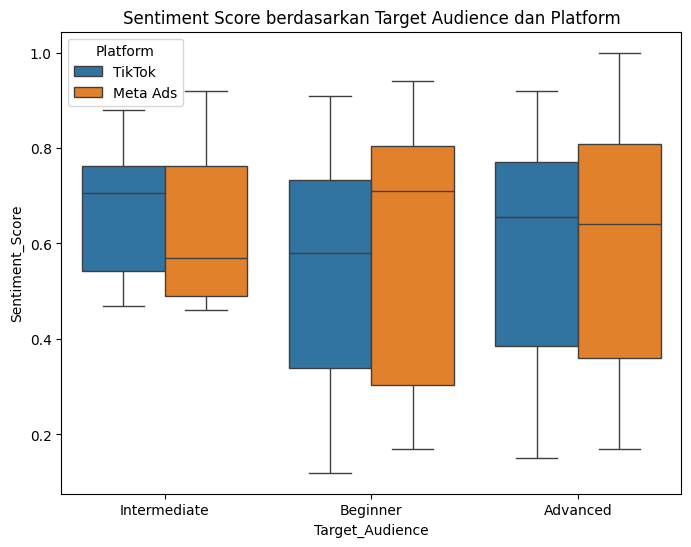

In [ ]:
# Distribusi hubungan antar vaeriabel
plt.figure(figsize=(8,6))
sns.boxplot(x='Target_Audience', y='Sentiment_Score', hue='Platform', data=data)
plt.title('Sentiment Score berdasarkan Target Audience dan Platform')
plt.show()

**Insight:**
*   Untuk audiens Intermediate, TikTok memiliki median skor sentimen yang lebih tinggi dibandingkan Meta Ads
*   Untuk audiens Beginner, Meta Ads memiliki variasi skor sentimen yang lebih luas dan median yang lebih tinggi dibandingkan TikTok
*   Untuk audiens Advanced, median skor sentimen pada TikTok dan Meta Ads hampir sama, tanpa perbedaan pola yang mencolok

Secara keseluruhan, TikTok lebih efektif untuk audiens Intermediate, sementara Meta Ads lebih unggul untuk audiens Beginner, dan keduanya memiliki dampak yang seimbang pada audiens Advanced.





**Summary Insight:**
*   Platform Tiktok lebih dominan daripada Meta Ads.
*   Terdapat perbedaan dalam distribusi skor sentimen baik berdasarkan platform maupun tipe produk, dengan Tiktok dan Bootcam menonjol dalam hal sentimen yang lebih positif.
*   Iklan paling sering dibuat pada bulan Januari, Agustus dan Oktober.
*   Platform Tiktok lebih efektif untuk audiens Intermediate, sementara Meta Ads lebih unggul untuk audiens Beginner, dan kedua platform ini memiliki dampak yang seimbang pada audiens Advanced.


**Actionable Insight/Recommendation:**
* Fokuskan alokasi anggaran iklan lebih besar ke Tiktok dan optimalkan strategi konten dengan tren yang sedang viral untuk meningkatkan jangkauan.
* TikTok dan Bootcamp memiliki sentimen yang lebih positif dibandingkan yang lain, maka strategi pemasaran sebaiknya lebih banyak menggunakan testimoni pengguna dan konten dari pelanggan untuk memperkuat kepercayaan terhadap brand.
* Tingkatkan intensitas iklan dan buat promo khusus di bulan-bulan Januari, Agustus, dan Oktober
* Gunakan Meta Ads untuk menarik beginner, TikTok Ads untuk meningkatkan engagement intermediate, dan kombinasikan keduanya untuk audience advanced.


## Performance

1. Distribusi Platform : Apakah TikTok atau Meta Ads lebih dominan dalam hal jumlah impresi dan klik?
2. CTR : Bagaimana distribusi CTR? Apakah ada perbedaan signifikan antara platform atau jenis perangkat?
3. Waktu Interaksi : Kapan interaksi paling sering terjadi (berdasarkan tahun/bulan)?
4. Hubungan Antar Variabel : Apakah ada pola tertentu antara jenis perangkat, platform, dan metrik kinerja seperti CTR?

In [ ]:
# Memuat data dari file CSV
data2 = pd.read_csv('performance_table.csv', delimiter=";")

# Menampilkan beberapa baris pertama dari dataset
data2.head()

,User_ID,Ad_ID,Platform,Impressions,Clicks,CTR,Device_Type,Interaction_Date
0,U001,A001,TikTok,1082,70,0.064695,Mobile,18/07/2024
1,U001,A002,TikTok,4098,229,0.055881,Mobile,06/09/2023
2,U001,A003,Meta Ads,2673,136,0.050879,Desktop,31/08/2024
3,U001,A004,TikTok,4252,216,0.050800,Desktop,09/09/2024
4,U001,A005,Meta Ads,3437,177,0.051498,Tablet,23/08/2024


In [ ]:
# 1. Distribusi Platform

# a. Jumlah impresi berdasarkan platform
impressions_by_platforms = data2.groupby('Platform')['Impressions'].sum().reset_index()
print(impressions_by_platforms)

   Platform  Impressions
0  Meta Ads     60260910
1    TikTok     77025058


<ipython-input-39-9d16cbe1926f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=impressions_by_platforms, x='Platform', y='Impressions', palette='Set2')


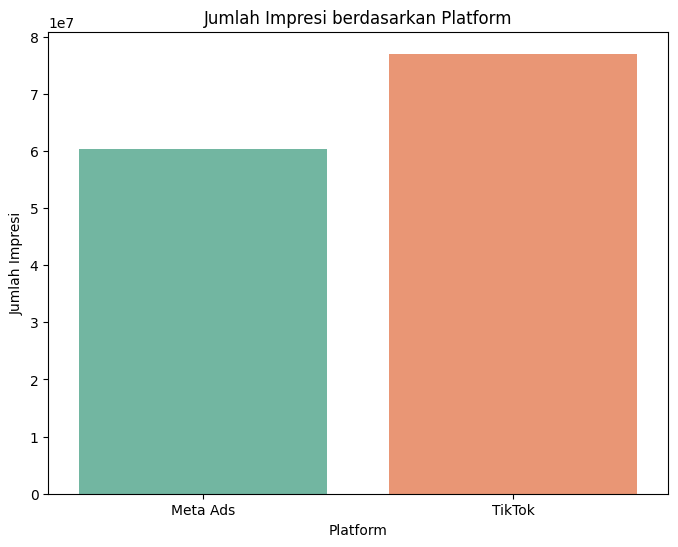

In [ ]:
# a. Visualisasi jumlah impresi berdasarkan platform
plt.figure(figsize=(8,6))
sns.barplot(data=impressions_by_platforms, x='Platform', y='Impressions', palette='Set2')
plt.title('Jumlah Impresi berdasarkan Platform')
plt.xlabel('Platform')
plt.ylabel('Jumlah Impresi')
plt.show()

In [ ]:
# b. Jumlah klik berdasarkan platform
clicks_by_platforms = data2.groupby('Platform')['Clicks'].sum().reset_index()
print (clicks_by_platforms)

   Platform   Clicks
0  Meta Ads  3010567
1    TikTok  3855528


<ipython-input-41-6e8b283416a3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clicks_by_platforms, x='Platform', y='Clicks', palette='Set2')


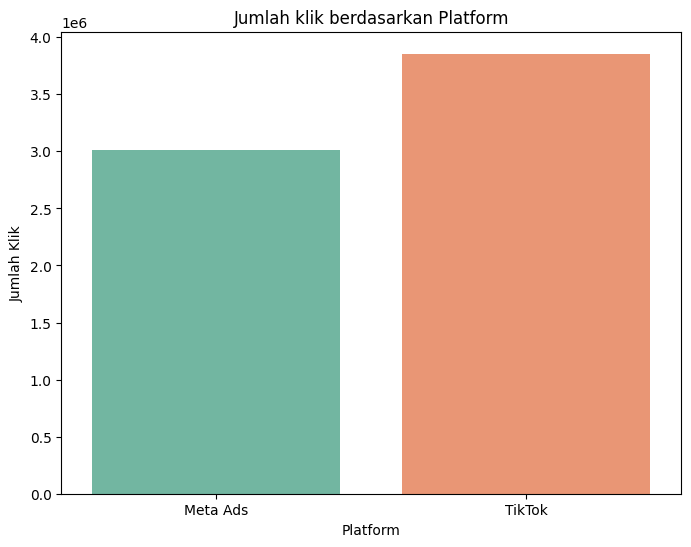

In [ ]:
# b. Visualisasi jumlah klik per platform
plt.figure(figsize=(8,6))
sns.barplot(data=clicks_by_platforms, x='Platform', y='Clicks', palette='Set2')
plt.title('Jumlah klik berdasarkan Platform')
plt.xlabel('Platform')
plt.ylabel('Jumlah Klik')
plt.show()

**Insight:**

* Jumlah impresi TikTok lebih dominan dibandingkan Meta Ads.
* Jumlah klik TikTok lebih dominan dibandingkan Meta Ads
* Iklan di TikTok mendapatkan lebih banyak impresi dan klik dibandingkan Meta Ads. Hal ini menunjukkan bahwa platform TikTok lebih efektif dalam menarik perhatian dan minat pengguna.

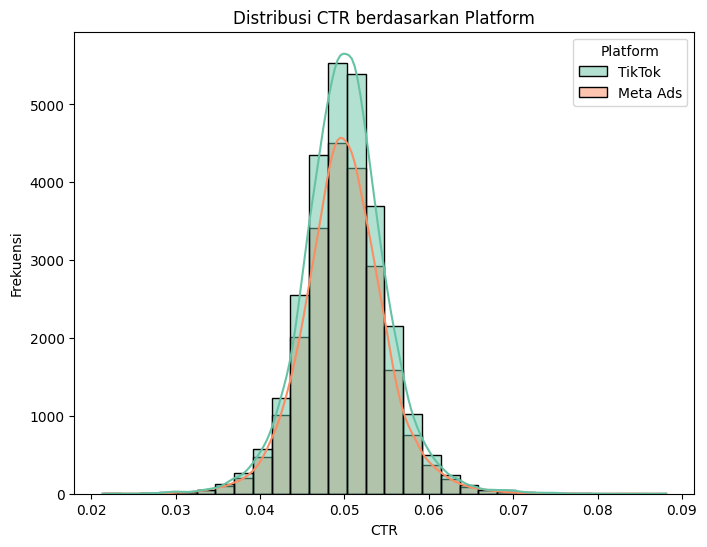

In [ ]:
# 2. Distribusi CTR berdasarkan Platform
plt.figure(figsize=(8, 6))
sns.histplot(data=data2, x='CTR', hue='Platform', kde=True, bins=30, palette='Set2')
plt.title('Distribusi CTR berdasarkan Platform')
plt.xlabel('CTR')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
* Mayoritas iklan memiliki performa yang relatif stabil dan mirip (CTR 0.04-0.06).
* TikTok memiliki lebih banyak iklan dengan CTR dalam kisaran tertentu dibandingkan Meta Ads. Hal ini menunjukkan bahwa TikTok memiliki potensi engagement yang lebih tinggi.
* Hanya sedikit iklan yang memiliki CTR sangat tinggi Hal ini menunjukkan bahwa hanya sedikit iklan yang berhasil menarik lebih banyak interaksi dibandingkan kebanyakan iklan lainnya. Artinya ada faktor yang membuat beberapa iklan lebih menarik dibandingkan iklan yang lain.

In [ ]:
# 2. CTR Menurut Platform dan Device Type

# Rata-rata CTR per platform
ctr_per_platform = data2.groupby('Platform')['CTR'].sum()

# Rata-rata CTR per device type
ctr_per_device = data2.groupby('Device_Type')['CTR'].sum()

print(ctr_per_device)
print(ctr_per_platform)


Device_Type
Desktop    834.262903
Mobile     838.799125
Tablet     827.939672
Name: CTR, dtype: float64
Platform
Meta Ads    1099.097991
TikTok      1401.903709
Name: CTR, dtype: float64


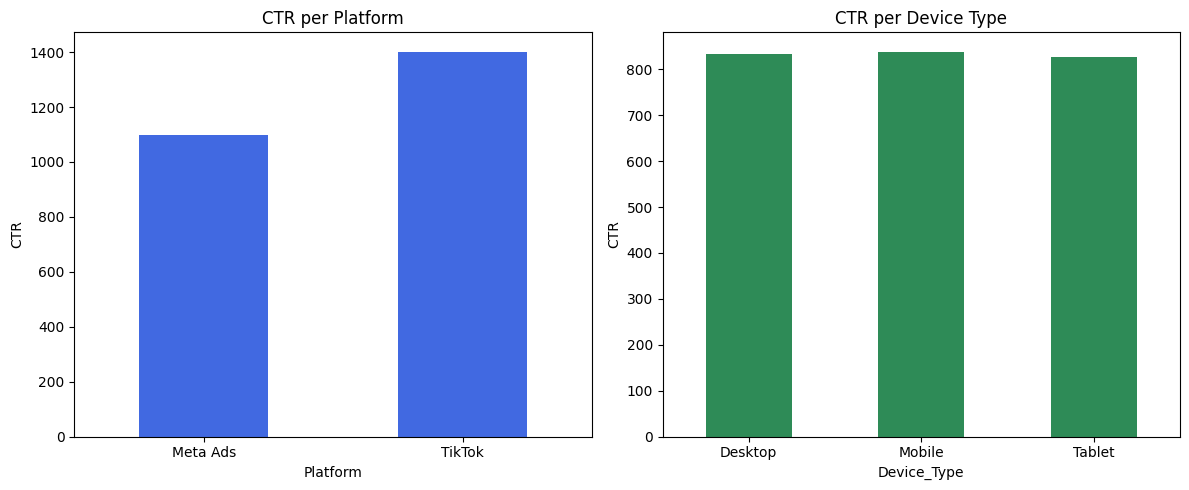

In [ ]:
# Visualisasi CTR Menurut Platform dan Device Type
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart untuk Platform
ctr_per_platform.plot(kind='bar', ax=ax[0], color='royalblue')
ax[0].set_title('CTR per Platform')
ax[0].set_ylabel('CTR')
ax[0].set_xlabel('Platform')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0)

# Bar chart untuk Device Type
ctr_per_device.plot(kind='bar', ax=ax[1], color='seagreen')
ax[1].set_title('CTR per Device Type')
ax[1].set_ylabel('CTR')
ax[1].set_xlabel('Device_Type')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

Insight:
* TikTok memiliki CTR lebih tinggi dibandingkan Meta Ads, menunjukkan bahwa iklan di TikTok lebih efektif dalam menarik klik pengguna.
* Tidak ada perbedaan signifikan dalam CTR berdasarkan jenis perangkat. Mobile, desktop, dan tablet memiliki performa yang serupa.

In [ ]:
# 3. Waktu Interaksi

# Mengubah data type ke datetime
data2['Interaction_Date'] = pd.to_datetime(data2['Interaction_Date'])

# Mengekstrak berdasarkan tahun dan bulan
interaction_date = data2['Interaction_Date']
data2['Year'] = data2['Interaction_Date'].dt.year
data2['Month'] = data2['Interaction_Date'].dt.month

# Interaksi berdasarkan bulan dan tahun
interaction_by_month = data2.groupby(['Year', 'Month']).size().reset_index(name='Count')
print(interaction_by_month)

    Year  Month  Count
0   2023      1   1996
1   2023      2   1731
2   2023      3   2003
3   2023      4   1929
4   2023      5   1958
5   2023      6   1927
6   2023      7   1903
7   2023      8   2023
8   2023      9   1983
9   2023     10   1988
10  2023     11   1944
11  2023     12   1998
12  2024      1   2053
13  2024      2   1959
14  2024      3   1919
15  2024      4   1973
16  2024      5   1989
17  2024      6   1940
18  2024      7   2003
19  2024      8   1974
20  2024      9   1951
21  2024     10   2015
22  2024     11   1911
23  2024     12   1918
24  2025      1   2012
25  2025      2   1000


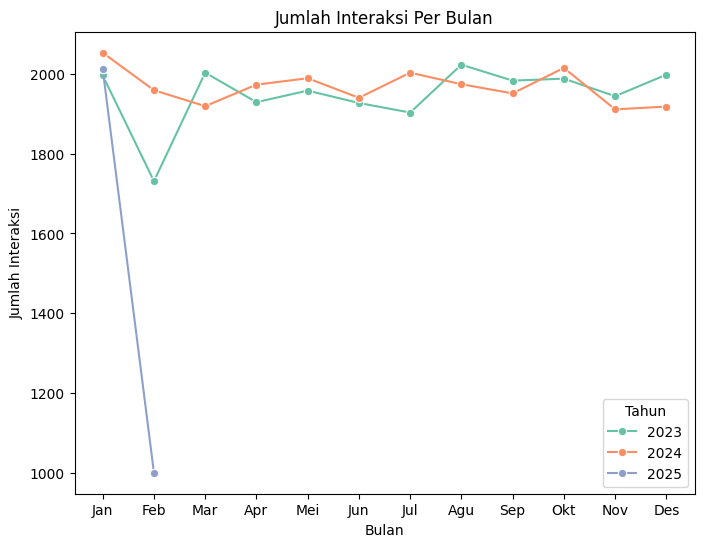

In [ ]:
# Visualisasi waktu interaksi
plt.figure(figsize=(8, 6))
sns.lineplot(data=interaction_by_month, x='Month', y='Count', hue='Year', marker='o', palette='Set2')
plt.title('Jumlah Interaksi Per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Interaksi')
plt.legend(title='Tahun')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
plt.show()

**Insight**
* Interaksi pengguna pada bulan Desember dan Januari menunjukkan tren peningkatan yang konsisten setiap tahun. Hal ini disebabkan oleh momen liburan akhir tahun untuk menyambut tahun baru dan perayaan hari raya natal. Selain itu, promosi-promosi dilakukan oleh berbagai pihak sehingga pengguna cenderung lebih aktif berinteraksi selama periode ini.
* 3 bulan dengan interaksi tertinggi yaitu bulan Januari 2024, Oktober 2024, dan Januari 2025. Januari adalah periode paling aktif bagi audiens.
* Interaksi pada bulan Februari selalu menunjukkan tren penurunan setiap tahun. Penurunan ini terjadi karena pasca aktivitas liburan. Namun, untuk Februari 2025 datanya belum lengkap karena bulan Februari 2025 masih berjalan.
* Interaksi paling sering terjadi di bulan Januari 2024 dengan jumlah interaksi sebanyak 2053. Hal ini didorong oleh momentum awal tahun.


In [ ]:
# Mengubah data type ke datetime
data2['Interaction_Date'] = pd.to_datetime(data2['Interaction_Date'])

# Mengekstrak Tahun, Bulan, dan Hari
data2['Year'] = data2['Interaction_Date'].dt.year
data2['Month'] = data2['Interaction_Date'].dt.month
data2['Day'] = data2['Interaction_Date'].dt.day
data2['Weekday'] = data2['Interaction_Date'].dt.day_name()  # Nama hari (Senin, Selasa, dst.)

# Interaksi berdasarkan Tahun, Bulan, dan Hari
interaction_by_date = data2.groupby(['Year', 'Month', 'Day', 'Weekday']).size().reset_index(name='Count')

# Menghitung jumlah interaksi per hari dalam seminggu
interaction_by_weekday = data2.groupby('Weekday').size().reset_index(name='Count')

# Menampilkan hasil
print(interaction_by_weekday)

     Weekday  Count
0     Friday   7195
1     Monday   7071
2   Saturday   7152
3     Sunday   7268
4   Thursday   7133
5    Tuesday   7062
6  Wednesday   7119


<ipython-input-20-d0ad0aa6fe35>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot( data=interaction_by_weekday, x='Weekday', y='Count', palette='Set2')


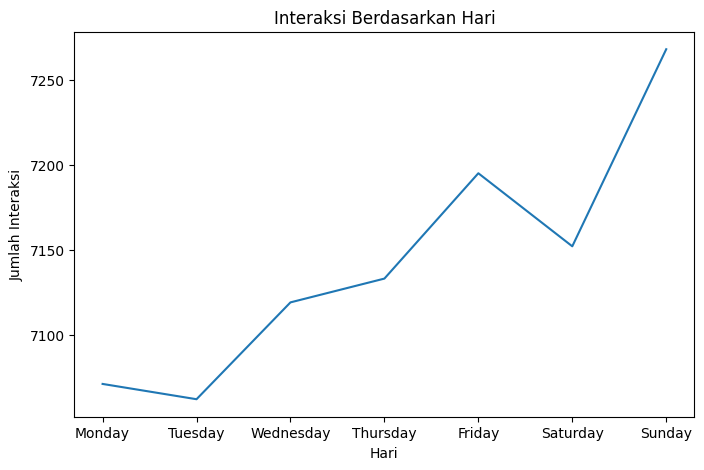

In [ ]:
# Mengurutkan hari agar dimulai dari Senin
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
interaction_by_weekday['Weekday'] = pd.Categorical(interaction_by_weekday['Weekday'], categories=order, ordered=True)
interaction_by_weekday = interaction_by_weekday.sort_values('Weekday')

# Visualisasi Interaksi per Hari dalam Seminggu
plt.figure(figsize=(8, 5))
sns.lineplot( data=interaction_by_weekday, x='Weekday', y='Count', palette='Set2')
plt.title('Interaksi Berdasarkan Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Interaksi')
plt.show()

Insight:
* Hari dengan interaksi tertinggi adalah hari minggu.
* Hari dengan interaksi terendah adalah hari Selasa.
* Hari Jumat-Minggu memiliki interaksi yang sedikit lebih tinggi dibandingkan hari lainnya. Hal ini menunjukkan bahwa pengguna lebih banyak berinteraksi saat memiliki waktu luang.
* Hari kerja juga cenderung memiliki interaksi stabil, tidak ada hari dengan penurunan drastis. Hal ini menunjukkan bahwa pengguna aktif setiap hari dalam jumlah yang hampir sama dan kemungkinan aktif saat istirahat kerja atau setelah jam kerja.

In [ ]:
# 4. Korelasi antara Perangkat, Platform, dan CTR

# Label Encoding
data2[['Platform', 'Device_Type']] = data2[['Platform', 'Device_Type']].apply(lambda x: x.astype('category').cat.codes)

# Menghitung korelasi antara Platform, Device Type, dan CTR
correlation_matrix = data2[['Platform', 'Device_Type', 'CTR']].corr()

# Menampilkan matriks korelasi
print(correlation_matrix)

             Platform  Device_Type       CTR
Platform     1.000000    -0.000836  0.010900
Device_Type -0.000836     1.000000  0.004101
CTR          0.010900     0.004101  1.000000


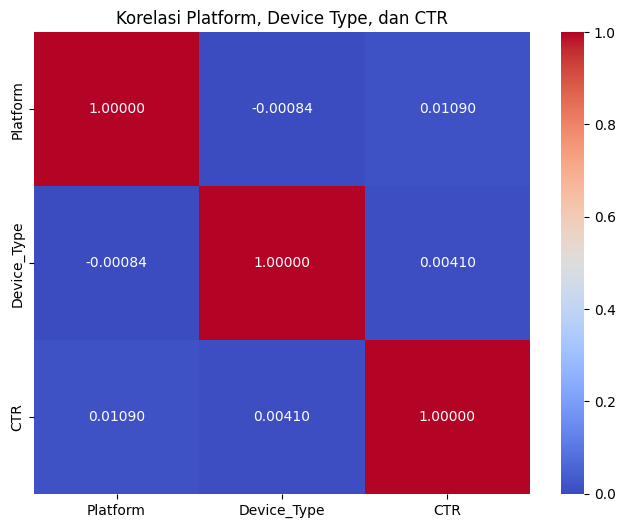

In [ ]:
# Visualisasi korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".5f")
plt.title("Korelasi Platform, Device Type, dan CTR")
plt.show()

Insight:

* Korelasi antara Platform dan CTR (0.01090). Nilai korelasi yang sangat kecil menunjukkan bahwa Platform (TikTok atau Meta Ads) tidak berpengaruh besar terhadap CTR. Hal ini menunjukkan bahwa performa iklan dalam hal CTR tidak tergantung pada platform yang digunakan.
* Korelasi antara Device Type dan CTR (0.00410). Nilai korelasi yang sangat kecil menunjukkan bahwa jenis perangkat (Mobile, Desktop, Tablet) tidak berpengaruh besar terhadap CTR. Hal ini menunjukkan bahwa pengguna yang melihat iklan di Mobile, Desktop, atau Tablet memiliki tingkat interaksi yang hampir sama.
* Korelasi antara Platform dan Device Type (-0.00084). Nilai mendekati nol menunjukkan bahwa Platform dan Device Type tidak memiliki hubungan yang berarti. Hal ini menunjukkan bahwa baik TikTok dan Meta Ads digunakan secara merata di berbagai perangkat, tanpa ada platform yang lebih dominan di perangkat tertentu.

**Summary Insight:**

* TikTok memiliki tingkat engagement yang lebih tinggi dibandingkan Meta Ads. TikTok merupakan platform yang lebih efektif untuk menjangkau dan menarik interaksi pengguna.
* CTR Device type tidak menunjukkan perbedaan yang signifikan, sehingga device bukan faktor utama dalam mempengaruhi CTR.
* Interaksi pengguna secara konsisten meningkat setiap tahun pada bulan Desember dan Januari, didorong oleh momen liburan, perayaan Natal, dan promosi akhir tahun. Januari adalah bulan dengan interaksi tertinggi, sementara Februari selalu mengalami penurunan interaksi karena pengguna kembali ke rutinitas normal pasca-liburan.
* Interaksi pengguna lebih tinggi pada hari Jumat hingga Minggu dibandingkan hari lainnya, dengan puncak interaksi terjadi pada hari Minggu.
* Platform dan perangkat tidak berpengaruh besar terhadap CTR.

**Actionable Insight:**
* Gunakan TikTok sebagai platform utama untuk menjalankan kampanye iklan, karena platform TikTok memberikan jangkauan pengguna yang lebih luas dan tingkat interaksi yang lebih tinggi dibandingkan Meta Ads.
* Tingkatkan frekuensi dan intensitas iklan selama bulan Desember dan Januari untuk memanfaatkan peningkatan interaksi pengguna yang dipicu oleh momen liburan, perayaan Natal, dan menyambut tahun baru.
* Fokuskan kampanye iklan pada hari Jumat hingga Minggu (khususnya pada hari Minggu) karena periode ini memiliki tingkat interaksi pengguna yang lebih tinggi dibandingkan hari lainnya.

## User

1. Distribusi Gender : Apakah pengguna lebih banyak laki-laki atau perempuan?
2. Distribusi Lokasi : Kota mana yang memiliki jumlah pengguna terbanyak?
3. Distribusi Minat : Minat apa yang paling populer di kalangan pengguna?
4. Distribusi Usia : Bagaimana distribusi usia pengguna? Apakah ada outlier?
5. Waktu Pendaftaran : Kapan pengguna paling sering mendaftar (berdasarkan tahun/bulan)?
6. Hubungan Antar Variabel : Apakah ada pola tertentu antara usia, lokasi, dan minat?

In [ ]:
# Memuat data dari file CSV
data3 = pd.read_csv('users_table.csv', delimiter=";")

# Menampilkan beberapa baris pertama dari dataset
data3.head()

,User_ID,Age,Gender,Location,Subscription_Type,Last_Activity_Date,Engagement_Score
0,U001,58,Female,Medan,Learning Plan,09/10/2024,0.43
1,U002,25,Male,Jakarta,Private Class,15/02/2023,0.81
2,U003,22,Male,Surabaya,Bootcamp,06/12/2023,0.88
3,U004,29,Male,Jakarta,Private Class,05/10/2023,0.60
4,U005,21,Male,Medan,Bootcamp,12/05/2023,0.97


In [ ]:
# 1. Distribusi gender
gender_counts = data3['Gender'].value_counts()
print(gender_counts)

Gender
Male      503
Female    497
Name: count, dtype: int64


<ipython-input-48-8f8024385c48>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data3, x='Gender', palette='Set2')


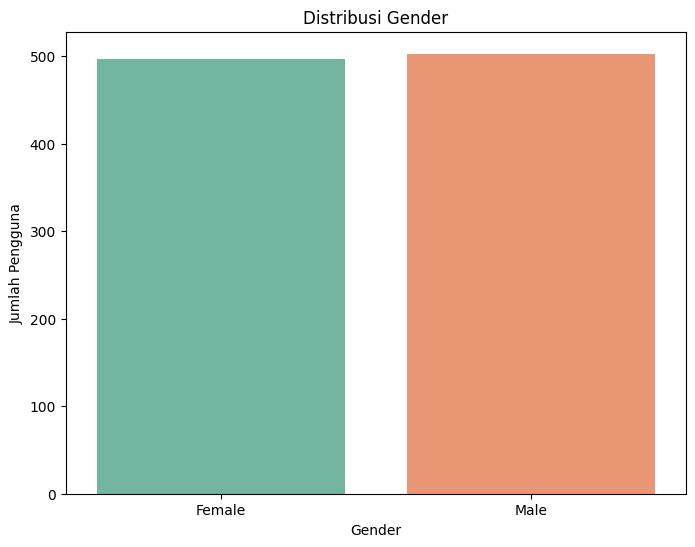

In [ ]:
# Visualisasi distribusi gender
plt.figure(figsize=(8,6))
sns.countplot(data=data3, x='Gender', palette='Set2')
plt.title('Distribusi Gender')
plt.xlabel('Gender')
plt.ylabel('Jumlah Pengguna')
plt.show()

**Insight**

Jumlah pengguna laki-laki lebih banyak dibandingkan jumlah pengguna perempuan.

In [ ]:
# 2. Distribusi lokasi
location_counts = data3['Location'].value_counts()
print(location_counts)

Location
Jakarta     208
Medan       204
Bandung     203
Surabaya    194
Makassar    191
Name: count, dtype: int64


<ipython-input-50-86fbde1ca2b6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data3, y='Location', palette='Set2')


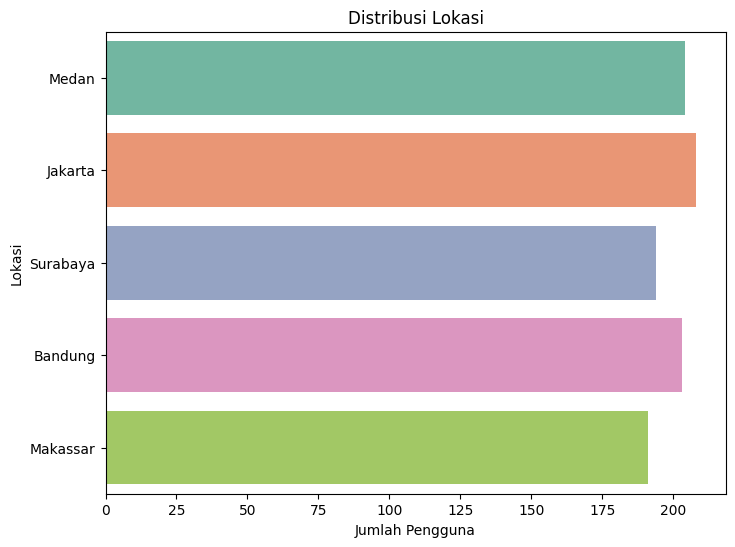

In [ ]:
# Visualisasi distribusi lokasi
plt.figure(figsize=(8,6))
sns.countplot(data=data3, y='Location', palette='Set2')
plt.title('Distribusi Lokasi')
plt.xlabel('Jumlah Pengguna')
plt.ylabel('Lokasi')
plt.show()

**Insight:**

Jumlah pengguna terbanyak terdapat di Kota Jakarta sebanyak 208 pengguna.

In [ ]:
# 3. Distribusi minat
minat_counts = data3['Subscription_Type'].value_counts()
print(minat_counts)

Subscription_Type
Learning Plan    335
Private Class    334
Bootcamp         331
Name: count, dtype: int64


<ipython-input-54-8fa1fefbdaa7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data3, x='Subscription_Type', palette='Set2')


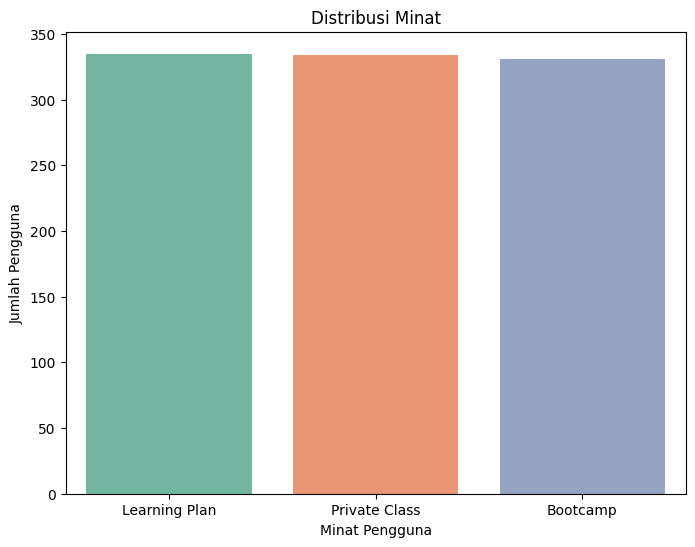

In [ ]:
# Visualisasi distribusi minat
plt.figure(figsize=(8,6))
sns.countplot(data=data3, x='Subscription_Type', palette='Set2')
plt.title('Distribusi Minat')
plt.xlabel('Minat Pengguna')
plt.ylabel('Jumlah Pengguna')
plt.show()

**Insight**:

Minat yang paling populer dikalangan pengguna yaitu Private Class yang memiliki sedikit selisih dengan Learning Plan. Minat paling sedikit dikalangan pengguna yaitu Bootcamp.

In [ ]:
# 4. Distribusi usia pengguna
print(data3['Age'].describe())

count    1000.000000
mean       39.496000
std        11.814634
min        18.000000
25%        30.000000
50%        40.000000
75%        49.000000
max        59.000000
Name: Age, dtype: float64


<ipython-input-57-f7070e7307cd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data3, x='Age', palette='Set2')


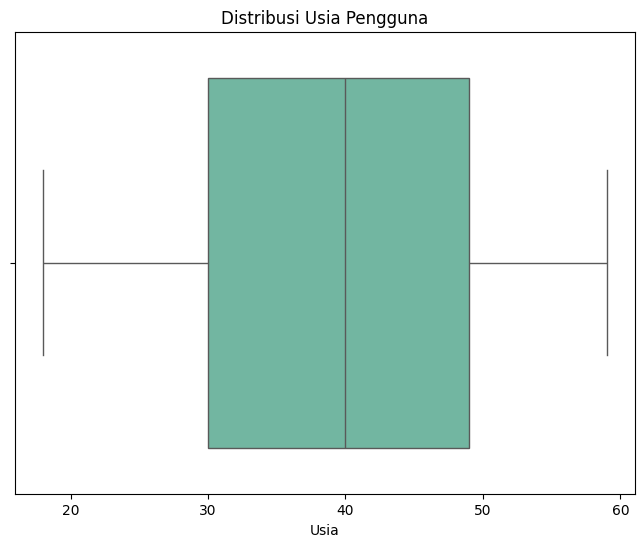

In [ ]:
# Visualisasi distribusi usia pengguna
plt.figure(figsize=(8,6))
sns.boxplot(data=data3, x='Age', palette='Set2')
plt.title('Distribusi Usia Pengguna')
plt.xlabel('Usia')
plt.show()

**Insight:**
* Usia pengguna berada  pada rentang usia 18 hingga 59 tahun, dengan rata-rata usia pengguna yaitu 39 tahun.
* Berdasarkan boxplot, tidak terlihat outlier yang signifikan.

In [ ]:
# 5. Waktu pendaftaran???

# Tren aktivitas pengguna

# Mengubah data type ke datetime
data3['Last_Activity_Date'] = pd.to_datetime(data3['Last_Activity_Date'], dayfirst=True)

# Mengekstrak berdasarkan tahun dan bulan
last_activity_date = data3['Last_Activity_Date']
data3['Year'] = data3['Last_Activity_Date'].dt.year
data3['Month'] = data3['Last_Activity_Date'].dt.month

# Tren aktivitas pengguna berdasarkan bulan dan tahun
activity_by_month = data3.groupby(['Year', 'Month']).size().reset_index(name='Count')
activity_by_month = activity_by_month.sort_values(by=['Year', 'Month'])  # Pastikan urutannya benar
activity_by_month['Period'] = activity_by_month['Year'].astype(str) + '-' + activity_by_month['Month'].astype(str).str.zfill(2)

print(activity_by_month)

    Year  Month  Count   Period
0   2023      1     31  2023-01
1   2023      2     43  2023-02
2   2023      3     38  2023-03
3   2023      4     33  2023-04
4   2023      5     54  2023-05
5   2023      6     27  2023-06
6   2023      7     39  2023-07
7   2023      8     34  2023-08
8   2023      9     31  2023-09
9   2023     10     46  2023-10
10  2023     11     49  2023-11
11  2023     12     35  2023-12
12  2024      1     36  2024-01
13  2024      2     37  2024-02
14  2024      3     38  2024-03
15  2024      4     49  2024-04
16  2024      5     47  2024-05
17  2024      6     37  2024-06
18  2024      7     37  2024-07
19  2024      8     33  2024-08
20  2024      9     40  2024-09
21  2024     10     26  2024-10
22  2024     11     45  2024-11
23  2024     12     44  2024-12
24  2025      1     46  2025-01
25  2025      2     25  2025-02


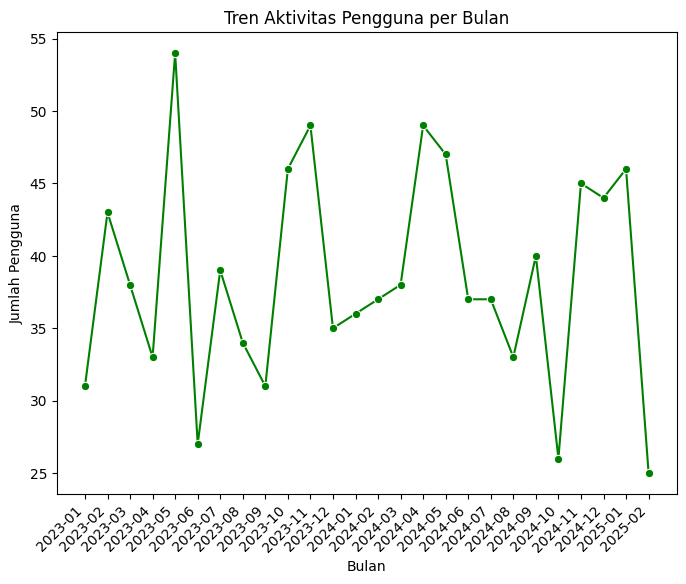

In [ ]:
# Visualisasi tren aktivitas pengguna

plt.figure(figsize=(8, 6))
sns.lineplot(data=activity_by_month, x='Period', y='Count', marker='o', color='g')
plt.title('Tren Aktivitas Pengguna per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pengguna')
plt.xticks(rotation=45, ha='right')
plt.show()

**Insight:**
* Jumlah pengguna cenderung naik turun dengan lonjakan signifikan di Mei 2023, Oktober 2023, dan
November 2024.
* Penurunan tajam terlihat di Juni 2023, Agustus 2024, dan Februari 2025 yang menunjukkan bahwa banyak pengguna menjadi kurang aktif dalam periode tersebut.
* 2024 memiliki aktivitas tertinggi dengan 469 pengguna aktif. 2023 juga tinggi dengan 460 pengguna aktif. 2025 sejauh ini hanya 71 pengguna aktif.

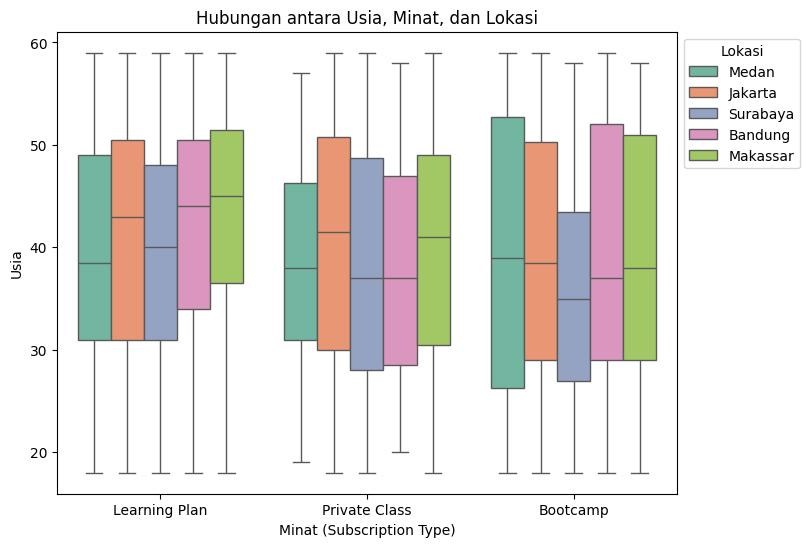

In [ ]:
# 6. Hubungan antara Usia, Lokasi, dan Minat (Subscription_Type)
plt.figure(figsize=(8, 6))
sns.boxplot(data=data3, x="Subscription_Type", y="Age", hue="Location", palette='Set2')
plt.title("Hubungan antara Usia, Minat, dan Lokasi")
plt.xlabel("Minat (Subscription Type)")
plt.ylabel("Usia")
plt.legend(title="Lokasi", bbox_to_anchor=(1, 1))
plt.show()

**Insight:**
* **Hubungan usia dan minat**  
* Minat pengguna terhadap Learning Plan, Private Class, dan Bootcamp relatif merata di semua kelompok usia.
* Learning Plan diminati oleh pengguna yang berusia 30-an ke atas
* Private Class dan Bootcamp diminati oleh pengguna dengan usia menengah hingga lebih tua.

* **Hubungan usia dan lokasi terhadap minat**
* Learning Plan di Makassar didominasi oleh pengguna berusia 35 tahun ke atas.
* Bootcamp di Bandung memiliki distribusi usia yang cukup merata di rentang akhir 20-an hingga 50 tahun.
* Bootcamp di Surabaya lebih banyak diminati oleh pengguna berusia 50 tahun ke bawah, dengan dominasi kelompok usia di akhir 20-an hingga 35 tahun.
* Di kota Makassar, pengguna cenderung berusia lebih tua dibandingkan dengan pengguna dari kota lainnya. Hal ini menunjukkan bahwa minat di kota ini lebih tinggi pada kelompok usia menengah ke atas.

Summary Insight:
* Mayoritas pengguna adalah laki-laki.
* Mayoritas pengguna berasal dari Jakarta.
* Rata-rata pengguna berusia 39 tahun.
* Jumlah pengguna naik turun, dengan lonjakan besar di Mei 2023, Oktober 2023, dan November 2024.
* Private Class adalah minat paling populer, diikuti Learning Plan. Bootcamp adalah yang paling sedikit peminatnya.
* Minat pengguna terhadap Learning Plan, Private Class, dan Bootcamp cukup merata di semua usia.
* Learning Plan lebih diminati oleh pengguna 30 tahun ke atas.
* Minat pengguna terhadap program bervariasi berdasarkan usia dan lokasi.

**Actionable Insight:**
* Strategi pemasaran dapat difokuskan pada preferensi laki-laki atau menyesuaikan konten agar lebih menarik bagi perempuan untuk meningkatkan jumlah pengguna perempuan.
* Private Class dan Learning Plan bisa dijadikan fokus utama karena lebih diminati pengguna.
* Bootcamp perlu strategi khusus untuk meningkatkan daya tariknya, misalnya dengan paket promo atau testimoni dari peserta sukses.
* Iklan sebaiknya disesuaikan untuk audiens dewasa. Gaya komunikasi profesional dan informasi yang lebih mendalam akan lebih efektif dibandingkan pendekatan yang kasual.
* Produk tidak terbatas pada satu kelompok usia, sehingga strategi pemasaran dapat mencakup berbagai segmen usia.
* Iklan atau promosi Learning Plan bisa lebih diarahkan ke kelompok usia 30-an ke atas, misalnya dengan menyoroti manfaatnya untuk karir dan pengembangan diri.